In [1]:
from account_book import AccountBook

FILEPATH = "MoneyTracking.xlsx"
account_book = AccountBook(FILEPATH)

In [2]:
def get_sheets(currency_name):
    income = account_book.income.loc[account_book.income["currency"]==currency_name]
    outcome = account_book.spending.loc[account_book.spending["currency"]==currency_name]
    transfer_from = account_book.transfer_from.loc[account_book.transfer_from["currency"]==currency_name]
    transfer_to = account_book.transfer_to.loc[account_book.transfer_to["currency"]==currency_name]
    return {"income": income, "outcome": outcome, "transfer_from": transfer_from, "transfer_to": transfer_to}

# Get USD only
us = get_sheets("USD")

In [3]:
def get_balance(currency, account):
    sheets = get_sheets(currency)
    money_in = (
        currency["income"].loc[currency["income"]["account"] == account]["amount"].sum() +
        currency["transfer_to"].loc[currency["transfer_to"]["account"] == account]["amount"].sum()
    )
    money_out = (
        currency["outcome"].loc[currency["outcome"]["account"] == account]["amount"].sum() +
        currency["transfer_from"].loc[currency["transfer_from"]["account"] == account]["amount"].sum()
    )
    return float(money_in - money_out)

print("===============================================================")
print("MAKE SURE THE AMOUNTS ARE IDENTICAL TO YOUR BANK ACCOUNT")
print("===============================================================")
print("Saving: {:.2f}".format(get_balance(us, "Saving")))
print("Checking: {:.2f}".format(get_balance(us, "Checking")))
print("Cash: {:.2f}".format(get_balance(us, "Cash")))
print("Credit Card: {:.2f}".format(get_balance(us, "Credit Card")))

MAKE SURE THE AMOUNTS ARE IDENTICAL TO YOUR BANK ACCOUNT
Saving: 63500.69
Checking: 3813.78
Cash: 55.00
Credit Card: 76.34


In [16]:
pet = us["outcome"]
pet.loc[pet.category == "Pet"] 

,date,currency,bank,account,amount,category,detail,note,credit_card,Unnamed: 9
48,2020-07-07,USD,Bank of America,Credit Card,70.83,Pet,PetSmart,NaN,Bank of America Cash Rewards World Master Card...,NaN
49,2020-07-07,USD,Bank of America,Credit Card,185.24,Pet,PetSmart,NaN,Bank of America Cash Rewards World Master Card...,NaN
51,2020-07-08,USD,Bank of America,Credit Card,94.11,Pet,Pet Food Express,NaN,Bank of America Cash Rewards World Master Card...,NaN
53,2020-07-09,USD,Bank of America,Credit Card,46.51,Pet,PetSmart,NaN,Bank of America Cash Rewards World Master Card...,NaN
58,2020-07-10,USD,Bank of America,Credit Card - Evelyn,14.19,Pet,Amazon,NaN,NaN,trash bag
69,2020-07-18,USD,Bank of America,Credit Card,50.00,Pet,Evergreen Pet Clinic,NaN,Bank of America Cash Rewards World Master Card...,NaN
71,2020-07-18,USD,Bank of America,Credit Card - Evelyn,18.39,Pet,Amazon,NaN,NaN,sifting litter box
88,2020-07-27,USD,Bank of America,Credit Card - Evelyn,14.19,Pet,Amazon,NaN,NaN,usb rechargeable laser pointer
92,2020-07-30,USD,Bank of America,Credit Card,16.86,Pet,PetSmart,NaN,Bank of America Cash Rewards World Master Card...,NaN
103,2020-08-02,USD,Bank of America,Credit Card - Evelyn,122.60,Pet,Chewy,NaN,NaN,"Cat tree, shampoo, seat cover and e-collar"


In [6]:
# evelyn_credit_card = us["outcome"].loc[us["outcome"]["account"] == "Credit Card - Evelyn"]
# print("Credit Card (Evelyn): {:.2f}".format(-evelyn_credit_card["amount"].sum()))

In [7]:
def get_spending_df(currency, start_date, end_date):
    return currency["outcome"].loc[(currency["outcome"]["date"] >= start_date) & (currency["outcome"]["date"] <= end_date)]

def get_spending(currency, start_date, end_date):
    return get_spending_df(currency, start_date, end_date).groupby("category").sum()["amount"].sort_values(ascending=False)

def draw_spending_pie_chart(spending):
    spending.plot.pie(y="amount", startangle=90, autopct='%1.1f%%')
    
def get_spending_category_insight(currency, category, start_date, end_date):
    df = get_spending_df(us, start_date, end_date)
    df = df.loc[df.category == category]
    return df.groupby(df.detail.str.lower()).sum()["amount"].sort_values(ascending=False)

2020 Groceries overview
detail
target                    285.54
sprouts                   274.93
h mart                    230.51
trader joe's              213.67
99 ranch                  165.70
costco                    109.60
wholefood                  41.87
mitsuwa                    26.94
trarget                    23.60
168 market                 23.11
sheng kee barkey           22.19
pb hostetter paris bag     18.39
the market at north pa      6.24
tous les jours              5.50
Name: amount, dtype: float64


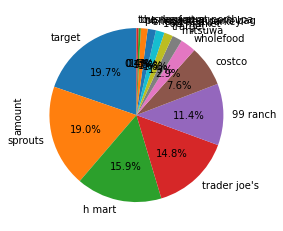

In [8]:
print("2020 Groceries overview")
start_date, end_date= "20200601", "20201231"
groceries = get_spending_category_insight(us, "Groceries", start_date, end_date)
print(groceries)
draw_spending_pie_chart(groceries)

In [9]:
start_date, end_date= "20200801", "20200831"
spending = get_spending(us, start_date, end_date)
print("===============================================================")
print("2020.08 Spending: {:.2f}".format(spending.sum()))
print("===============================================================")
print(spending)

print("******************")
print("Sub - Groceries")
print("******************")
print(get_spending_category_insight(us, "Groceries", start_date, end_date))

2020.08 Spending: 1306.79
category
Pet                         413.64
Home & Utilities            321.97
Restaurants & Dining        215.73
Cash,Check & Misc           205.00
Groceries                   121.68
Shopping & Entertainment     28.77
Name: amount, dtype: float64
******************
Sub - Groceries
******************
detail
trader joe's        70.50
target              32.83
sheng kee barkey    11.19
99 ranch             7.16
Name: amount, dtype: float64


2020.07 Spending: 13928.87
category
Cash,Check & Misc           10043.87
Home & Utilities             2328.43
Groceries                     723.56
Pet                           510.32
Restaurants & Dining          213.92
Transportation                 93.78
Shopping & Entertainment       14.99
Name: amount, dtype: float64
******************
Remove tuition
******************
category
Home & Utilities            2328.43
Groceries                    723.56
Pet                          510.32
Restaurants & Dining         213.92
Transportation                93.78
Cash,Check & Misc             43.87
Shopping & Entertainment      14.99
Name: amount, dtype: float64


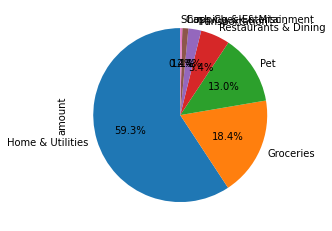

In [14]:
start_date, end_date= "20200701", "20200731"
spending = get_spending(us, start_date, end_date)
print("===============================================================")
print("2020.07 Spending: {:.2f}".format(spending.sum()))
print("===============================================================")
print(spending)

print("******************")
print("Remove tuition")
print("******************")
spneding_2020_07 = get_spending_df(us, start_date, end_date)
spending_2020_07_remove_tuition = spneding_2020_07[spneding_2020_07.detail != "SJSU Tuition"].groupby("category").sum()["amount"].sort_values(ascending=False)
print(spending_2020_07_remove_tuition)

draw_spending_pie_chart(spending_2020_07_remove_tuition)

In [15]:
start_date, end_date= "20200601", "20200630"
spending = get_spending(us, start_date, end_date)
print("===============================================================")
print("2020.06 Spending: {:.2f}".format(spending.sum()))
print("===============================================================")
print(spending)

2020.06 Spending: 2965.86
category
Home & Utilities            1974.48
Groceries                    602.55
Restaurants & Dining         352.09
Transportation                21.75
Shopping & Entertainment      14.99
Name: amount, dtype: float64
